# Image Filtering (2D convolution) - cv2.filter2D()

As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

cv2.filter2D() - convolves a kernel with an image.

Here we will apply a 5x5 averaging filter.

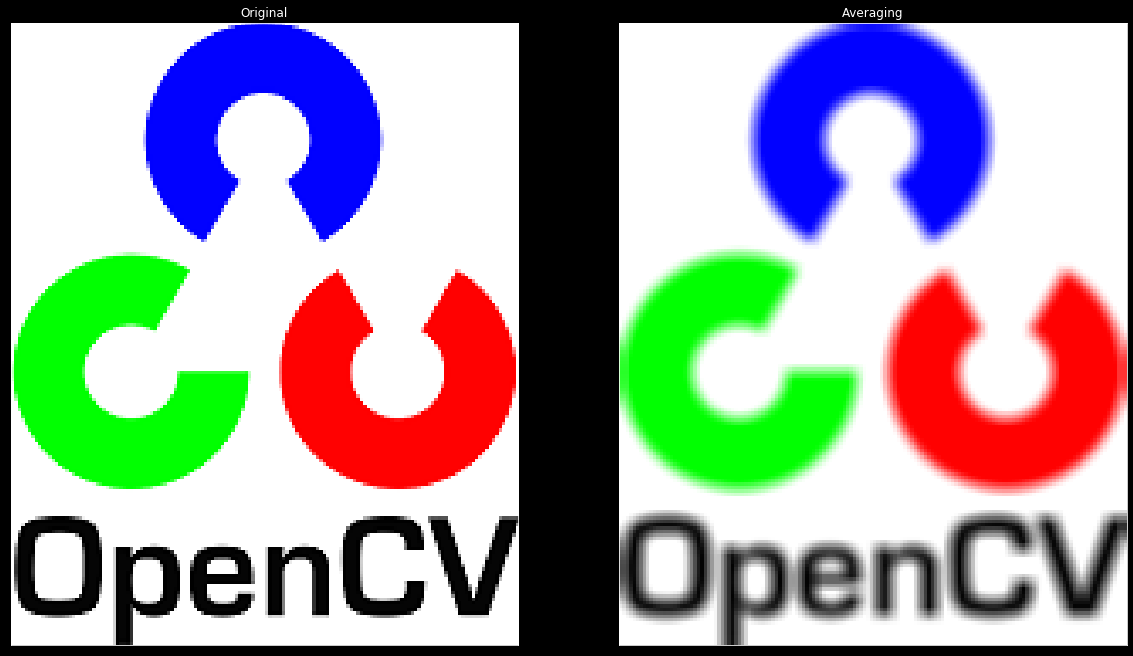

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20,13)

img = cv2.imread('opencv_logo.png')

# our kernel is a matrix 5x5 with "1" in every cell. It`s an averaging filter, it smoothes
kernel = np.ones((5, 5), np.float32) / 25 # /25 because it`s an AVERAGING filter
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([]) # don`t show the x,y axes
plt.subplot(122), plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([]) #  don`t show the x,y axes
plt.show();

# Image Blurring (Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel.

It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. (Well, there are blurring techniques which do not blur edges).

OpenCV provides mainly four types of blurring techniques:

## Averaging - cv2.blur(), cv2.boxFilter()

Averaging is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average (we did it "manually" in the previous section).

Averaging is done by the function cv2.blur() or cv2.boxFilter().

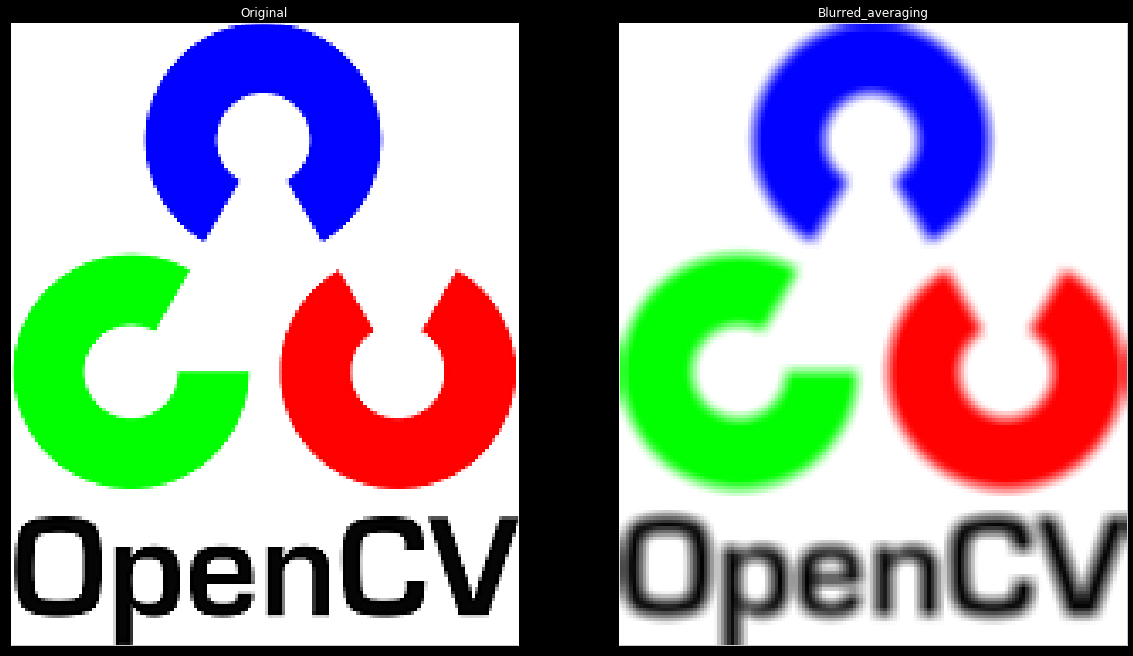

In [45]:
img = cv2.imread('opencv_logo.png')

blur = cv2.blur(img,(5, 5)) # for cv2.blur & cv2.bofFilter we should set the kernel size

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred_averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Filtering - cv2.GaussianBlur()

Use Gaussian kernel for smoothing. It gives our blurred image more prominent edges due to the form of the Gaussian distribution.

cv2.GaussianBlur() - We should specify the width and height of the kernel which should be positive and odd.

We also should specify the standard deviation in the X and Y directions (sigmaX and sigmaY). If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. 

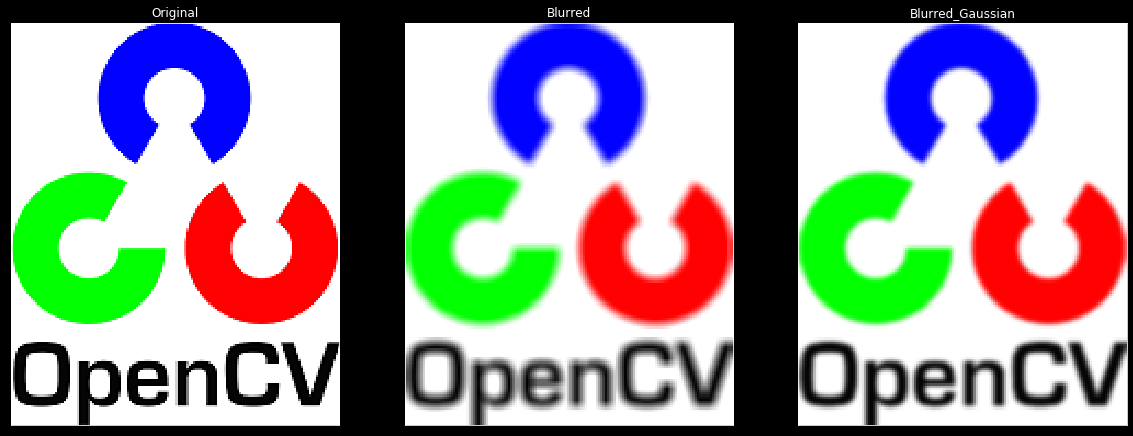

In [52]:
blur_Gaus = cv2.GaussianBlur(img, (5, 5), 0) # here "0" is sigma_x & sigma_y

plt.subplot(131), plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(blur_Gaus),plt.title('Blurred_Gaussian')
plt.xticks([]), plt.yticks([])
plt.show();

## Median Filtering - cv2.medianBlur() 

cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. The kernel size must be a positive odd integer.

This is highly effective in removing salt-and-pepper noise (consists of absolute white and pure black dots in the image).

One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image (it helps to preserve the color).

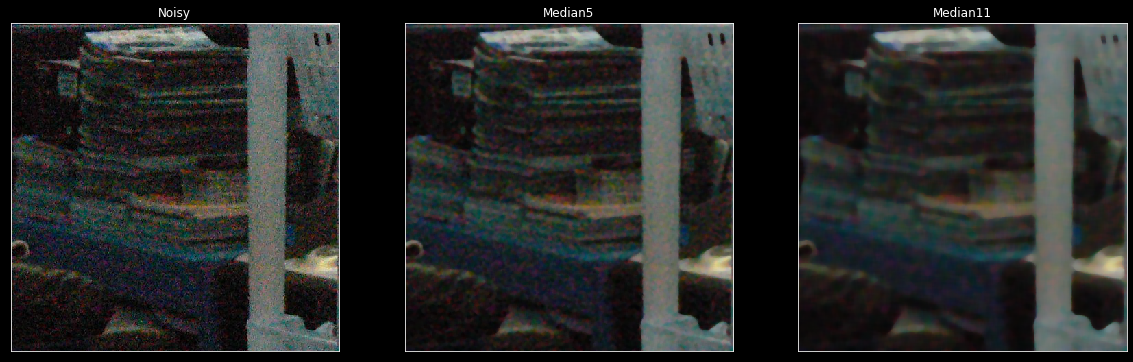

In [66]:
noisy = cv2.imread('Highimgnoise.jpg')
median11 = cv2.medianBlur(noisy, 11) # here "11" is our kernel size
median3 = cv2.medianBlur(noisy, 5)
# cv2.medianBlur?

plt.subplot(131), plt.imshow(noisy),plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(median3),plt.title('Median5')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(median11),plt.title('Median11')
plt.xticks([]), plt.yticks([])
plt.show();

## Bilateral Filtering - cv2.bilateralFilter()

cv2.bilateralFilter() was designed for noise removal with preserving the edges (but it slower than the other types of noise reduction).

The bilateral filter uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences.

The Gaussian function of space makes sure that only pixels that are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value.

As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge will not be included for blurring (because they will have large intensity variations when compared to the central pixel, therefore they will be excluded from the caclualtion of the central pixel by the Gaussian function of intensity differences).

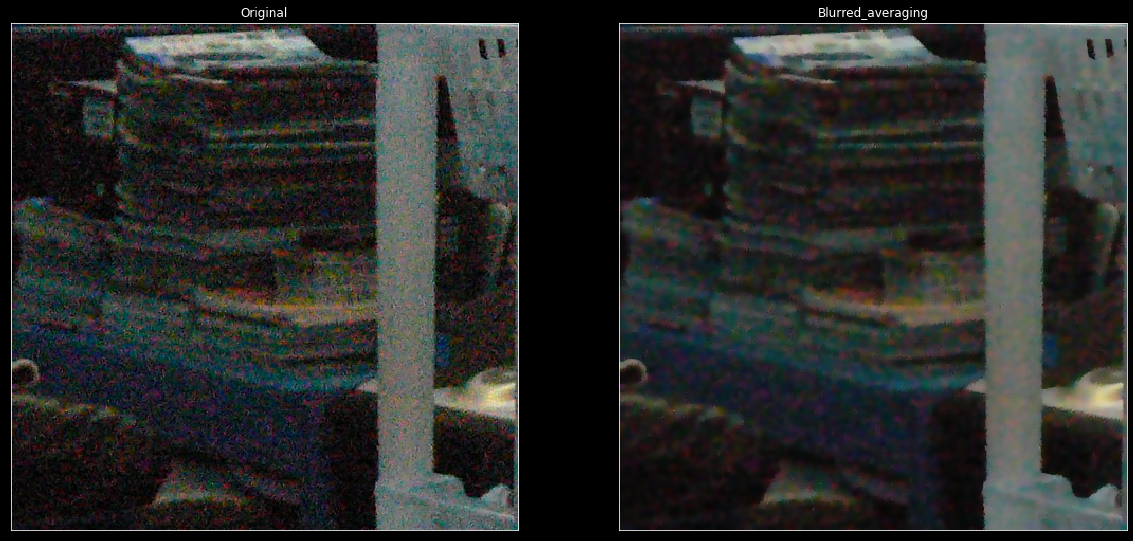

In [73]:
bilateral = cv2.bilateralFilter(noisy, 9, 75, 75) # read docs for the arguments
# cv2.bilateralFilter?

plt.subplot(121),plt.imshow(noisy),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bilateral),plt.title('Blurred_averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Morphological Transformations

## Erosion - cv2.erode()

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

## Dilation - cv2.dilate()

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

## Opening - cv2.MORPH_OPEN in cv2.morphologyEx()

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

## Closing - cv2.MORPH_CLOSE in cv2.morphologyEx()

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

## Morphological Gradient - cv2.MORPH_GRADIENT in cv2.morphologyEx()

It is the difference between dilation and erosion of an image.
The result will look like the outline of the object.

## Top Hat - cv2.MORPH_BLACKHAT in cv2.morphologyEx()

It is the difference between the closing of the input image and input image.

# Creating a Structuring Element - cv2.getStructuringElement()

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [79]:
# Rectangular Kernel
print(cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)), '\n')

# Elliptical Kernel
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), '\n')

# Cross-shaped Kernel
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)))


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]] 

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]] 

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
